# Water Consumption Prediction Model

This notebook builds a comprehensive model to predict water consumption patterns and identify optimal times for water supply limitations.

## Pipeline Steps:
1. Data Loading and Exploration
2. Feature Engineering
3. Data Preprocessing
4. Model Training and Evaluation
5. Future Consumption Prediction
6. Model Saving

In [2]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

#Set display options
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette('husl')

## 1. Data Loading and Initial Exploration

In [3]:
#Load the dataset
df = pd.read_excel('final_water_monitoring_dataset.xlsx')
print(f'Dataset shape: {df.shape}')
print(f'Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB')
print(f'Data types: {df.dtypes.value_counts().to_dict()}')

Dataset shape: (6000, 197)
Memory usage: 14.63 MB
Data types: {dtype('float64'): 167, dtype('O'): 27, dtype('int64'): 2, dtype('bool'): 1}


In [4]:
#Basic data exploration
print('Dataset Info:')
print(f'Shape: {df.shape}')
# Show first 10 columns
print(f'Columns: {df.columns.tolist()[:10]}...')
print(f'Missing values: {df.isnull().sum().sum()}')
print(f'Duplicates: {df.duplicated().sum()}')

Dataset Info:
Shape: (6000, 197)
Columns: ['id', 'community', 'housing_type', 'respondent_relationship_to_hh', 'gender', 'tenure', 'years_in_community', 'adult_count', 'child_count', 'rooms_in_hh']...
Missing values: 565240
Duplicates: 0


In [5]:
#Display first few rows and basic statistics
print('First 5 rows:')
display(df.head())
print('\nDataset statistics:')
display(df.describe())

First 5 rows:


,id,community,housing_type,respondent_relationship_to_hh,gender,tenure,years_in_community,adult_count,child_count,rooms_in_hh,business_ownership,business_location,business_category,business_water_use,business_water_source,primary_dw_source,dw_reason_convenience,dw_reason_affordable,dw_reason_available,dw_reason_cold,dw_reason_clean,dw_reason_taste,dw_reason_habit_or_cultural_norm,dw_reason_trustworthy,dw_reason_health,dw_reason_other,package_type_preference,package_size_reason_storage_space,package_size_reason_cost_effective,package_size_reason_temperature,package_size_reason_available_money,package_size_reason_convenience,package_size_reason_size,package_size_reason_avoid_wasting_water,dw_treatment,primary_water_source,primary_source_reason_proximity,primary_source_reason_convenience,primary_source_reason_affordable,primary_source_reason_availability,primary_source_reason_cleanliness,primary_source_reason_other,other_non_dw_source_use,other_non_dw_sources_packaged,other_non_dw_sources_piped_to_home,other_non_dw_sources_piped_to_neighbor,other_non_dw_sources_commercial_tap,other_non_dw_sources_piped_to_compound,other_non_dw_sources_borehole,other_non_dw_sources_dug_well,other_non_dw_sources_spring_water,other_non_dw_sources_delivered_water,other_non_dw_sources_other,secondary_source_reason_availability,secondary_source_reason_unclean,secondary_source_reason_crowding,secondary_source_reason_shower,secondary_source_reason_convenient_location,tap_payment_mode,daily_hh_water_cost_for_pay_to_fetch,daily_hh_water_cost_phhm_for_pay_to_fetch,past_struggle_to_find_water,time_of_last_struggle_to_find_water,weekdays_struggle_to_find_water,past_struggle_primary_reason,tap_closure_knowledge_known,tap_closure_knowledge_sometimes,tap_closure_knowledge_expected_pattern,tap_closure_knowledge_unknown,tap_closure_knowledge_no_answer,coping_mechanism_spend_more,coping_mechanism_purchase_more_to_store_at_home,coping_mechanism_use_other_source,coping_mechanism_sachet_to_cook,coping_mechanism_skipped_cooking,coping_mechanism_sachet_to_bathe,coping_mechanism_skipped_bathing,coping_mechanism_closed_business,coping_mechanism_skipped_laundry,water_storage_drinking_water,water_storage_non_drinking_water,water_storage_none,storage_containers_plastic_jug,storage_containers_uncovered_barrels,storage_containers_covered_barrels,storage_containers_other_covered,storage_containers_other_uncovered,estimated_non_dw_storage_capacity,estimated_stored_non_dw,type,available_services,location,year_established,year_established_unknown,owner,owner_na,constructor,managers,estimated_storage_capacity_liters,average_visits_per_customer,respondent_would_use_to_prepare_rice,perception_of_quality,tap_closure_days_per_week,price_25_liter_jug,price_20_liter_bucket,price_30_liter_basin,avg_price_per_liter_cedis,tap_closure_changes,flexible_pricing,price_increase,CBT_sample_source,coli_mpn,coli_mpn_ci,coli_mpn_health_risk,tc_mpn,tc_mpn_ci,tc_mpn_health_risk,Numeric_Sum,Numeric_Mean,id_z,years_in_community_z,adult_count_z,child_count_z,rooms_in_hh_z,business_ownership_z,business_water_use_z,dw_reason_other_z,package_size_reason_storage_space_z,package_size_reason_cost_effective_z,package_size_reason_temperature_z,package_size_reason_available_money_z,package_size_reason_convenience_z,package_size_reason_size_z,package_size_reason_avoid_wasting_water_z,other_non_dw_sources_packaged_z,other_non_dw_sources_piped_to_home_z,other_non_dw_sources_piped_to_neighbor_z,other_non_dw_sources_commercial_tap_z,other_non_dw_sources_piped_to_compound_z,other_non_dw_sources_borehole_z,other_non_dw_sources_dug_well_z,other_non_dw_sources_spring_water_z,other_non_dw_sources_delivered_water_z,other_non_dw_sources_other_z,secondary_source_reason_availability_z,secondary_source_reason_unclean_z,secondary_source_reason_crowding_z,secondary_source_reason_shower_z,secondary_source_reason_convenient_location_z,daily_hh_water_cost_for_pay_to_fetch_z,daily_hh_water_cost_phhm_for_pay_to_fetch_z,weekdays_strugg


Dataset statistics:


,id,years_in_community,adult_count,child_count,rooms_in_hh,business_ownership,business_water_use,dw_reason_convenience,dw_reason_affordable,dw_reason_available,dw_reason_cold,dw_reason_clean,dw_reason_taste,dw_reason_habit_or_cultural_norm,dw_reason_trustworthy,dw_reason_health,dw_reason_other,package_size_reason_storage_space,package_size_reason_cost_effective,package_size_reason_temperature,package_size_reason_available_money,package_size_reason_convenience,package_size_reason_size,package_size_reason_avoid_wasting_water,primary_source_reason_proximity,primary_source_reason_convenience,primary_source_reason_affordable,primary_source_reason_availability,primary_source_reason_cleanliness,primary_source_reason_other,other_non_dw_source_use,other_non_dw_sources_packaged,other_non_dw_sources_piped_to_home,other_non_dw_sources_piped_to_neighbor,other_non_dw_sources_commercial_tap,other_non_dw_sources_piped_to_compound,other_non_dw_sources_borehole,other_non_dw_sources_dug_well,other_non_dw_sources_spring_water,other_non_dw_sources_delivered_water,other_non_dw_sources_other,secondary_source_reason_availability,secondary_source_reason_unclean,secondary_source_reason_crowding,secondary_source_reason_shower,secondary_source_reason_convenient_location,daily_hh_water_cost_for_pay_to_fetch,daily_hh_water_cost_phhm_for_pay_to_fetch,past_struggle_to_find_water,weekdays_struggle_to_find_water,tap_closure_knowledge_known,tap_closure_knowledge_sometimes,tap_closure_knowledge_expected_pattern,tap_closure_knowledge_unknown,tap_closure_knowledge_no_answer,coping_mechanism_spend_more,coping_mechanism_purchase_more_to_store_at_home,coping_mechanism_use_other_source,coping_mechanism_sachet_to_cook,coping_mechanism_skipped_cooking,coping_mechanism_sachet_to_bathe,coping_mechanism_skipped_bathing,coping_mechanism_closed_business,coping_mechanism_skipped_laundry,water_storage_drinking_water,water_storage_non_drinking_water,water_storage_none,storage_containers_plastic_jug,storage_containers_uncovered_barrels,storage_containers_covered_barrels,storage_containers_other_covered,storage_containers_other_uncovered,estimated_non_dw_storage_capacity,estimated_stored_non_dw,year_established,year_established_unknown,owner_na,estimated_storage_capacity_liters,average_visits_per_customer,tap_closure_days_per_week,price_25_liter_jug,price_20_liter_bucket,price_30_liter_basin,avg_price_per_liter_cedis,flexible_pricing,price_increase,coli_mpn,coli_mpn_ci,tc_mpn,tc_mpn_ci,Numeric_Sum,Numeric_Mean,id_z,years_in_community_z,adult_count_z,child_count_z,rooms_in_hh_z,business_ownership_z,business_water_use_z,dw_reason_other_z,package_size_reason_storage_space_z,package_size_reason_cost_effective_z,package_size_reason_temperature_z,package_size_reason_available_money_z,package_size_reason_convenience_z,package_size_reason_size_z,package_size_reason_avoid_wasting_water_z,other_non_dw_sources_packaged_z,other_non_dw_sources_piped_to_home_z,other_non_dw_sources_piped_to_neighbor_z,other_non_dw_sources_commercial_tap_z,other_non_dw_sources_piped_to_compound_z,other_non_dw_sources_borehole_z,other_non_dw_sources_dug_well_z,other_non_dw_sources_spring_water_z,other_non_dw_sources_delivered_water_z,other_non_dw_sources_other_z,secondary_source_reason_availability_z,secondary_source_reason_unclean_z,secondary_source_reason_crowding_z,secondary_source_reason_shower_z,secondary_source_reason_convenient_location_z,daily_hh_water_cost_for_pay_to_fetch_z,daily_hh_water_cost_phhm_for_pay_to_fetch_z,weekdays_struggle_to_find_water_z,tap_closure_knowledge_known_z,tap_closure_knowledge_sometimes_z,tap_closure_knowledge_expected_pattern_z,tap_closure_knowledge_unknown_z,tap_closure_knowledge_no_answer_z,coping_mechanism_spend_more_z,coping_mechanism_purchase_more_to_store_at_home_z,coping_mechanism_use_other_source_z,storage_containers_plastic_jug_z,storage_containers_uncovered_barrels_z,storage_containers_covered_barrels_z,storage_containers_other_covered_z,storage_containers_other_uncov

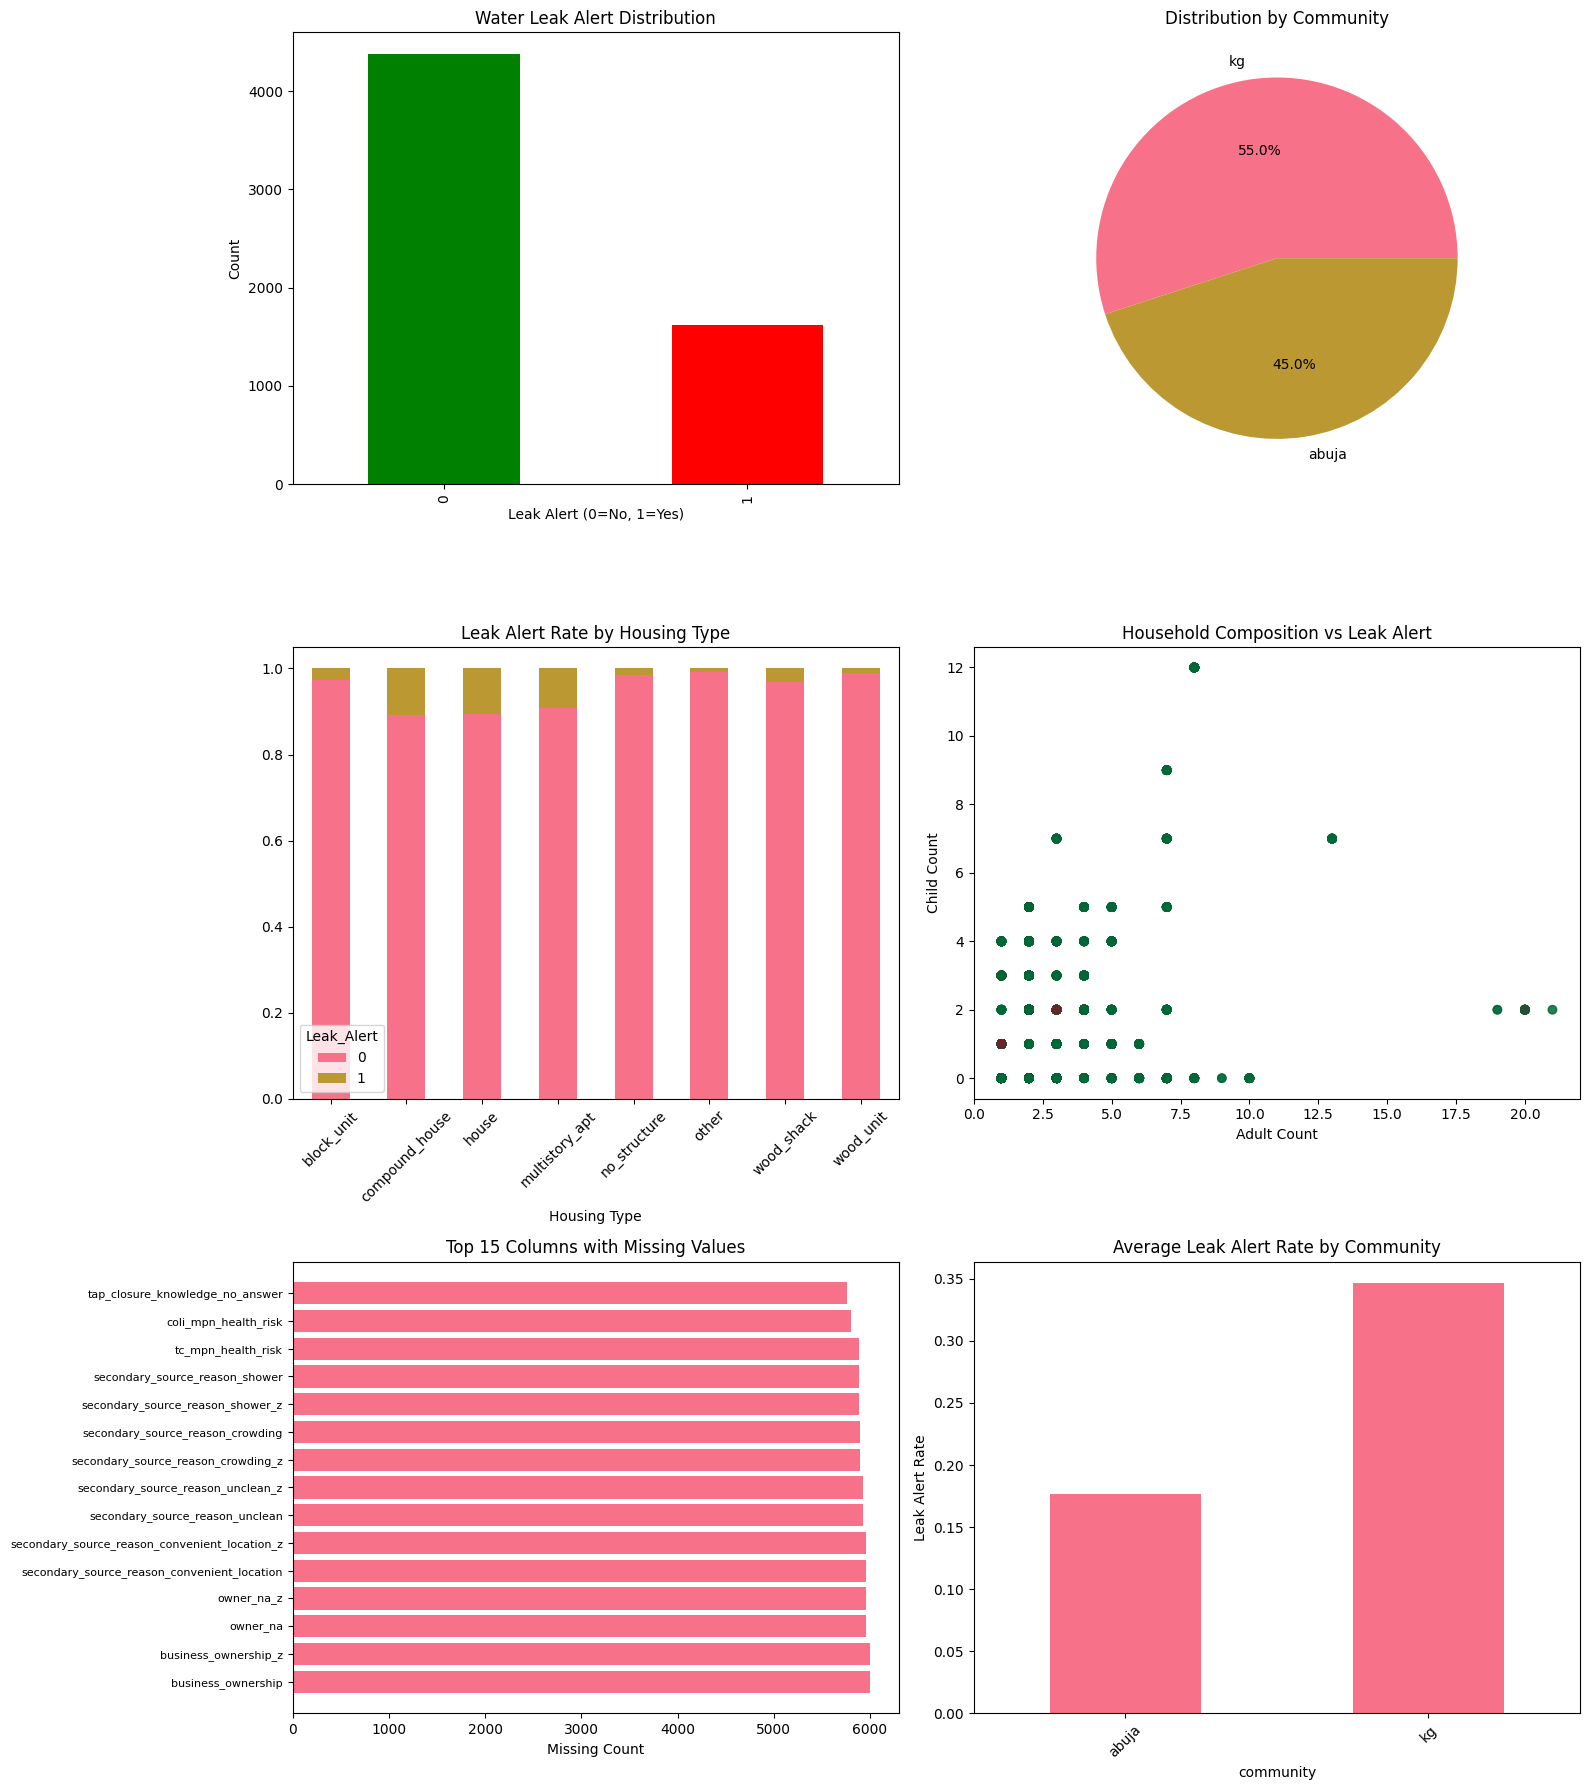

Key Data Insights:
- Leak alert rate: 27.0%
- Most common community: kg
- Average household size: 5.3 people
- Missing data percentage: 47.8%


In [6]:
#EDA Visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 18))

#Target variable distribution
df['Leak_Alert'].value_counts().plot(kind='bar', ax=axes[0,0], color=['green', 'red'])
axes[0,0].set_title('Water Leak Alert Distribution')
axes[0,0].set_xlabel('Leak Alert (0=No, 1=Yes)')
axes[0,0].set_ylabel('Count')

#Community distribution
community_counts = df['community'].value_counts()
axes[0,1].pie(community_counts.values, labels=community_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Distribution by Community')

#Housing type vs leak alert
housing_leak = pd.crosstab(df['housing_type'], df['Leak_Alert'], normalize='index')
housing_leak.plot(kind='bar', ax=axes[1,0], stacked=True)
axes[1,0].set_title('Leak Alert Rate by Housing Type')
axes[1,0].set_xlabel('Housing Type')
axes[1,0].tick_params(axis='x', rotation=45)

#Household composition
axes[1,1].scatter(df['adult_count'], df['child_count'],
                 c=df['Leak_Alert'], cmap='RdYlGn_r', alpha=0.6)
axes[1,1].set_xlabel('Adult Count')
axes[1,1].set_ylabel('Child Count')
axes[1,1].set_title('Household Composition vs Leak Alert')

#Missing data analysis
missing_data = df.isnull().sum().sort_values(ascending=False).head(15)
axes[2,0].barh(range(len(missing_data)), missing_data.values)
axes[2,0].set_yticks(range(len(missing_data)))
axes[2,0].set_yticklabels(missing_data.index, fontsize=8)
axes[2,0].set_title('Top 15 Columns with Missing Values')
axes[2,0].set_xlabel('Missing Count')

#Water consumption patterns by community
community_leak = df.groupby('community')['Leak_Alert'].mean()
community_leak.plot(kind='bar', ax=axes[2,1])
axes[2,1].set_title('Average Leak Alert Rate by Community')
axes[2,1].set_ylabel('Leak Alert Rate')
axes[2,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#key insights
print('Key Data Insights:')
print(f'- Leak alert rate: {df["Leak_Alert"].mean():.1%}')
print(f'- Most common community: {df["community"].mode()[0]}')
print(f'- Average household size: {(df["adult_count"] + df["child_count"]).mean():.1f} people')
print(f'- Missing data percentage: {(df.isnull().sum().sum() / df.size) * 100:.1f}%')

## 2. Feature Engineering

In [7]:
#Create new features for better prediction
print('Creating new features...')

#Household density features
df['total_people'] = df['adult_count'].fillna(0) + df['child_count'].fillna(0)
df['people_per_room'] = df['total_people'] / (df['rooms_in_hh'].fillna(1) + 0.1)
df['adult_child_ratio'] = df['adult_count'] / (df['child_count'] + 0.1)

#Economic indicators
df['owns_home'] = (df['tenure'] == 'owned').astype(int)
df['rents_home'] = (df['tenure'] == 'rented').astype(int)

#Community tenure categories
df['tenure_category'] = pd.cut(df['years_in_community'],
                              bins=[0, 5, 15, 30, 100],
                              labels=['New', 'Established', 'Long-term', 'Lifetime'],
                              include_lowest=True)

#Water access score (sum of water-related features)
water_cols = [col for col in df.columns if 'water' in col.lower() and df[col].dtype in ['float64', 'int64']]
if water_cols:
    df['water_access_score'] = df[water_cols].fillna(0).sum(axis=1)
else:
    df['water_access_score'] = 0

#Consumption risk score
df['consumption_risk_score'] = (df['total_people'] * 0.4 +
                               df['people_per_room'] * 0.3 +
                               df['water_access_score'] * 0.3)

print(f'New features created. Dataset shape: {df.shape}')
print('New features:', ['total_people', 'people_per_room', 'adult_child_ratio',
                       'owns_home', 'rents_home', 'water_access_score', 'consumption_risk_score'])

Creating new features...
New features created. Dataset shape: (6000, 205)
New features: ['total_people', 'people_per_room', 'adult_child_ratio', 'owns_home', 'rents_home', 'water_access_score', 'consumption_risk_score']


## 3. Data Preprocessing

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

print("Preprocessing data...")

df = df.copy()

#Identify numeric + categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

#Remove all-null numeric columns
empty_numeric = [col for col in numeric_cols if df[col].isnull().sum() == len(df)]
df.drop(columns=empty_numeric, inplace=True)

#Update numeric_cols after removing empty ones
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

#Impute missing values
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

#Encode categorical variables
for col in categorical_cols:
    if col != 'id':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

#Remove highly correlated features
corr_matrix = df[numeric_cols].corr()
high_corr_pairs = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.95:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

cols_to_drop = list({pair[1] for pair in high_corr_pairs})
df.drop(columns=cols_to_drop, inplace=True, errors="ignore")

print("Preprocessing completed!")


Preprocessing data...
Preprocessing completed!


In [9]:
df.isnull().sum().sort_values(ascending=False)

,0
id,0
community,0
housing_type,0
respondent_relationship_to_hh,0
gender,0
...,...
owns_home,0
rents_home,0
tenure_category,0
water_access_score,0


In [10]:
missing_df = (
    df.isnull().sum()
      .reset_index()
      .rename(columns={"index": "column", 0: "missing_count"})
      .sort_values("missing_count", ascending=False)
)

missing_df


,column,missing_count
0,id,0
1,community,0
2,housing_type,0
3,respondent_relationship_to_hh,0
4,gender,0
...,...,...
143,owns_home,0
144,rents_home,0
145,tenure_category,0
146,water_access_score,0


In [11]:
df['adult_count'].isnull().sum()

np.int64(0)

In [12]:
df['child_count'].isnull().sum()

np.int64(0)

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
for col in df.columns:
    print(col)

id
community
housing_type
respondent_relationship_to_hh
gender
tenure
years_in_community
adult_count
child_count
rooms_in_hh
business_location
business_category
business_water_use
business_water_source
primary_dw_source
dw_reason_convenience
dw_reason_affordable
dw_reason_available
dw_reason_cold
dw_reason_clean
dw_reason_taste
dw_reason_habit_or_cultural_norm
dw_reason_trustworthy
dw_reason_health
dw_reason_other
package_type_preference
package_size_reason_storage_space
package_size_reason_cost_effective
package_size_reason_temperature
package_size_reason_available_money
package_size_reason_convenience
package_size_reason_size
package_size_reason_avoid_wasting_water
dw_treatment
primary_water_source
primary_source_reason_proximity
primary_source_reason_convenience
primary_source_reason_affordable
primary_source_reason_availability
primary_source_reason_cleanliness
primary_source_reason_other
other_non_dw_source_use
other_non_dw_sources_packaged
other_non_dw_sources_piped_to_home
other

In [15]:
df

,id,community,housing_type,respondent_relationship_to_hh,gender,tenure,years_in_community,adult_count,child_count,rooms_in_hh,business_location,business_category,business_water_use,business_water_source,primary_dw_source,dw_reason_convenience,dw_reason_affordable,dw_reason_available,dw_reason_cold,dw_reason_clean,dw_reason_taste,dw_reason_habit_or_cultural_norm,dw_reason_trustworthy,dw_reason_health,dw_reason_other,package_type_preference,package_size_reason_storage_space,package_size_reason_cost_effective,package_size_reason_temperature,package_size_reason_available_money,package_size_reason_convenience,package_size_reason_size,package_size_reason_avoid_wasting_water,dw_treatment,primary_water_source,primary_source_reason_proximity,primary_source_reason_convenience,primary_source_reason_affordable,primary_source_reason_availability,primary_source_reason_cleanliness,primary_source_reason_other,other_non_dw_source_use,other_non_dw_sources_packaged,other_non_dw_sources_piped_to_home,other_non_dw_sources_piped_to_neighbor,other_non_dw_sources_commercial_tap,other_non_dw_sources_piped_to_compound,other_non_dw_sources_borehole,other_non_dw_sources_dug_well,other_non_dw_sources_spring_water,other_non_dw_sources_delivered_water,other_non_dw_sources_other,secondary_source_reason_availability,secondary_source_reason_unclean,secondary_source_reason_crowding,secondary_source_reason_shower,secondary_source_reason_convenient_location,tap_payment_mode,daily_hh_water_cost_for_pay_to_fetch,daily_hh_water_cost_phhm_for_pay_to_fetch,past_struggle_to_find_water,time_of_last_struggle_to_find_water,weekdays_struggle_to_find_water,past_struggle_primary_reason,tap_closure_knowledge_known,tap_closure_knowledge_sometimes,tap_closure_knowledge_expected_pattern,tap_closure_knowledge_unknown,tap_closure_knowledge_no_answer,coping_mechanism_spend_more,coping_mechanism_purchase_more_to_store_at_home,coping_mechanism_use_other_source,coping_mechanism_sachet_to_cook,coping_mechanism_skipped_cooking,coping_mechanism_sachet_to_bathe,coping_mechanism_skipped_bathing,coping_mechanism_closed_business,coping_mechanism_skipped_laundry,water_storage_drinking_water,water_storage_non_drinking_water,storage_containers_plastic_jug,storage_containers_uncovered_barrels,storage_containers_covered_barrels,storage_containers_other_covered,storage_containers_other_uncovered,estimated_non_dw_storage_capacity,estimated_stored_non_dw,type,available_services,location,year_established,year_established_unknown,owner,owner_na,constructor,managers,estimated_storage_capacity_liters,average_visits_per_customer,respondent_would_use_to_prepare_rice,perception_of_quality,tap_closure_days_per_week,price_25_liter_jug,price_20_liter_bucket,price_30_liter_basin,avg_price_per_liter_cedis,tap_closure_changes,flexible_pricing,price_increase,CBT_sample_source,coli_mpn,coli_mpn_health_risk,tc_mpn,tc_mpn_health_risk,Numeric_Sum,other_non_dw_sources_piped_to_home_z,other_non_dw_sources_piped_to_neighbor_z,other_non_dw_sources_piped_to_compound_z,other_non_dw_sources_dug_well_z,other_non_dw_sources_spring_water_z,other_non_dw_sources_other_z,secondary_source_reason_availability_z,secondary_source_reason_unclean_z,secondary_source_reason_crowding_z,secondary_source_reason_shower_z,secondary_source_reason_convenient_location_z,tap_closure_knowledge_no_answer_z,year_established_unknown_z,owner_na_z,Synthetic_Flag,id_roll3,id_roll5,years_in_community_roll3,years_in_community_roll5,adult_count_roll3,adult_count_roll5,child_count_roll3,child_count_roll5,rooms_in_hh_roll3,rooms_in_hh_roll5,Leak_Alert,total_people,people_per_room,adult_child_ratio,owns_home,rents_home,tenure_category,water_access_score,consumption_risk_score
0,1.0,0,0,2,0,2,0.0,1.0,0.0,1.0,0,0,1.0,0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2,2.0,1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,

## 4. Model Training and Evaluation

In [16]:
#Prepare features and target
target_col = 'Leak_Alert'
feature_cols = [col for col in df.columns if col not in ['id', target_col]]

X = df[feature_cols]
y = df[target_col]

print(f'Features: {X.shape[1]}')
print(f'Target distribution:')
print(y.value_counts(normalize=True))

#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f'Training set: {X_train.shape}')
print(f'Test set: {X_test.shape}')

Features: 146
Target distribution:
Leak_Alert
0.0    0.73
1.0    0.27
Name: proportion, dtype: float64
Training set: (4800, 146)
Test set: (1200, 146)


In [17]:
#Train multiple models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}

results = {}

for name, model in models.items():
    print(f'\nTraining {name}...')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

    accuracy = model.score(X_test_scaled, y_test)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None

    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'auc': auc,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

    print(f'Accuracy: {accuracy:.4f}')
    if auc: print(f'AUC: {auc:.4f}')
    print(classification_report(y_test, y_pred))


Training Random Forest...
Accuracy: 0.9083
AUC: 0.9617
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       876
         1.0       0.85      0.81      0.83       324

    accuracy                           0.91      1200
   macro avg       0.89      0.88      0.88      1200
weighted avg       0.91      0.91      0.91      1200


Training Gradient Boosting...
Accuracy: 0.9192
AUC: 0.9664
              precision    recall  f1-score   support

         0.0       0.94      0.95      0.95       876
         1.0       0.87      0.82      0.85       324

    accuracy                           0.92      1200
   macro avg       0.90      0.89      0.90      1200
weighted avg       0.92      0.92      0.92      1200


Training Logistic Regression...
Accuracy: 0.9067
AUC: 0.9550
              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94       876
         1.0       0.83      0.82      0.83       324

    

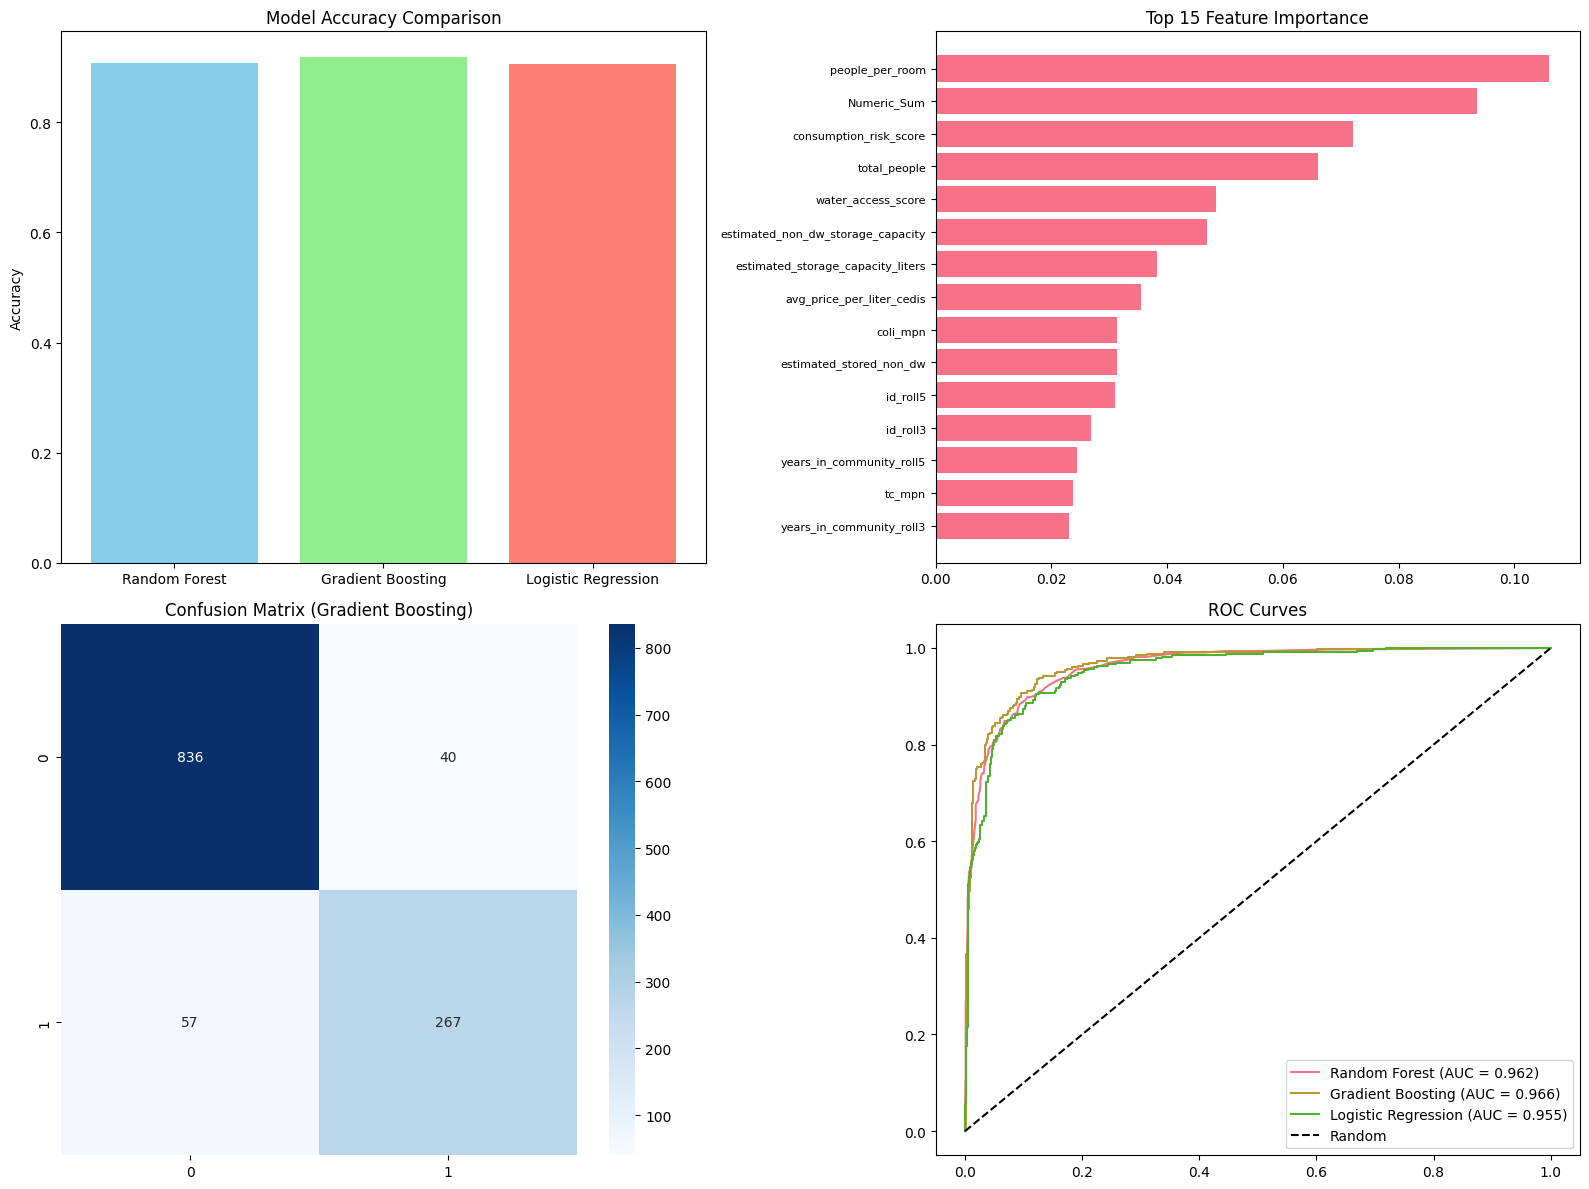

Best Model: Gradient Boosting with accuracy: 0.9192


In [18]:
#Model comparison and visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Model performance
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
axes[0,0].bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
axes[0,0].set_title('Model Accuracy Comparison')
axes[0,0].set_ylabel('Accuracy')

#Feature importance
rf_model = results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(15)

axes[0,1].barh(range(len(feature_importance)), feature_importance['importance'])
axes[0,1].set_yticks(range(len(feature_importance)))
axes[0,1].set_yticklabels(feature_importance['feature'], fontsize=8)
axes[0,1].set_title('Top 15 Feature Importance')
axes[0,1].invert_yaxis()

#Confusion Matrix
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_predictions = results[best_model_name]['predictions']
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', ax=axes[1,0], cmap='Blues')
axes[1,0].set_title(f'Confusion Matrix ({best_model_name})')

#ROC Curve
for name in results:
    if results[name]['probabilities'] is not None:
        fpr, tpr, _ = roc_curve(y_test, results[name]['probabilities'])
        axes[1,1].plot(fpr, tpr, label=f"{name} (AUC = {results[name]['auc']:.3f})")
axes[1,1].plot([0, 1], [0, 1], 'k--', label='Random')
axes[1,1].set_title('ROC Curves')
axes[1,1].legend()

plt.tight_layout()
plt.show()
print(f'Best Model: {best_model_name} with accuracy: {results[best_model_name]["accuracy"]:.4f}')

Feature Importance

In [19]:
print("Feature Importance Analysis")
#Using Gradient Boosting Model for feature importance
best_model_name = 'Gradient Boosting'
best_model = results[best_model_name]['model']

#Get feature importance
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

#Show top 30 features
print("\nTOP 30 MOST IMPORTANT FEATURES:")
print(feature_importance_df.head(30).to_string(index=False))

#Calculate cumulative importance
feature_importance_df['cumulative_importance'] = feature_importance_df['importance'].cumsum()

#Different feature set options
threshold_90 = feature_importance_df[feature_importance_df['cumulative_importance'] <= 0.90]
threshold_95 = feature_importance_df[feature_importance_df['cumulative_importance'] <= 0.95]
important_1pct = feature_importance_df[feature_importance_df['importance'] > 0.01]

print(f"\nFEATURE SET OPTIONS:")
print(f"   For 90% of importance: {len(threshold_90)} features")
print(f"   For 95% of importance: {len(threshold_95)} features")
print(f"   Features with >1% importance: {len(important_1pct)}")

#Top 25 features
recommended_features = feature_importance_df.head(25)['feature'].tolist()

print(f"\nTop {len(recommended_features)} features")
print(f"   This reduces from 146 → {len(recommended_features)} ({(1 - len(recommended_features)/146)*100:.1f}% reduction)")

print("\nSELECTED FEATURES:")
for i, feat in enumerate(recommended_features, 1):
    imp = feature_importance_df[feature_importance_df['feature'] == feat]['importance'].values[0]
    print(f"{i:2d}. {feat:45s} {imp:.4f}")

Feature Importance Analysis

TOP 30 MOST IMPORTANT FEATURES:
                             feature  importance
                         Numeric_Sum    0.839419
                            id_roll5    0.027943
                      Synthetic_Flag    0.025729
                   adult_count_roll5    0.014785
                   child_count_roll3    0.008437
                   child_count_roll5    0.007817
            years_in_community_roll3    0.007816
   estimated_non_dw_storage_capacity    0.006959
                   rooms_in_hh_roll5    0.006576
             estimated_stored_non_dw    0.006312
                   adult_count_roll3    0.006142
            years_in_community_roll5    0.006018
           avg_price_per_liter_cedis    0.005157
                              tc_mpn    0.005079
                            id_roll3    0.003766
               price_20_liter_bucket    0.003034
                  years_in_community    0.002884
                            coli_mpn    0.002390
        

In [20]:
clean_features = [
    'adult_count',
    'child_count',
    'rooms_in_hh',
    'years_in_community',
    'business_ownership',
    'primary_dw_source',
    'daily_hh_water_cost_for_pay_to_fetch',
    'water_storage_drinking_water',
    'coli_mpn',
    'tc_mpn',
    'tap_closure_days_per_week',
    'estimated_storage_capacity_liters',
    'total_people',
    'people_per_room',
    'consumption_risk_score',
    'water_access_score',
    'estimated_non_dw_storage_capacity',
    'estimated_stored_non_dw',
    'avg_price_per_liter_cedis'
]

In [21]:
#Define clean feature set
clean_features = [
    'adult_count',
    'child_count',
    'rooms_in_hh',
    'years_in_community',
    'business_ownership',
    'primary_dw_source',
    'daily_hh_water_cost_for_pay_to_fetch',
    'water_storage_drinking_water',
    'coli_mpn',
    'tc_mpn',
    'tap_closure_days_per_week',
    'estimated_storage_capacity_liters',
    'total_people',
    'people_per_room',
    'consumption_risk_score',
    'water_access_score',
    'estimated_non_dw_storage_capacity',
    'estimated_stored_non_dw',
    'avg_price_per_liter_cedis'
]

#Filter to only features that exist in the data
recommended_features = [f for f in clean_features if f in X_train.columns]

print(f"CLEAN FEATURE SET: {len(recommended_features)} features")
print("\nFeatures selected:")
for i, feat in enumerate(recommended_features, 1):
    if feat in feature_importance_df['feature'].values:
        imp = feature_importance_df[feature_importance_df['feature'] == feat]['importance'].values[0]
        print(f"{i:2d}. {feat:45s} {imp:.4f}")
    else:
        print(f"{i:2d}. {feat:45s} (not in training data)")

CLEAN FEATURE SET: 18 features

Features selected:
 1. adult_count                                   0.0002
 2. child_count                                   0.0000
 3. rooms_in_hh                                   0.0003
 4. years_in_community                            0.0029
 5. primary_dw_source                             0.0000
 6. daily_hh_water_cost_for_pay_to_fetch          0.0003
 7. water_storage_drinking_water                  0.0000
 8. coli_mpn                                      0.0024
 9. tc_mpn                                        0.0051
10. tap_closure_days_per_week                     0.0004
11. estimated_storage_capacity_liters             0.0020
12. total_people                                  0.0001
13. people_per_room                               0.0002
14. consumption_risk_score                        0.0000
15. water_access_score                            0.0006
16. estimated_non_dw_storage_capacity             0.0070
17. estimated_stored_non_dw          

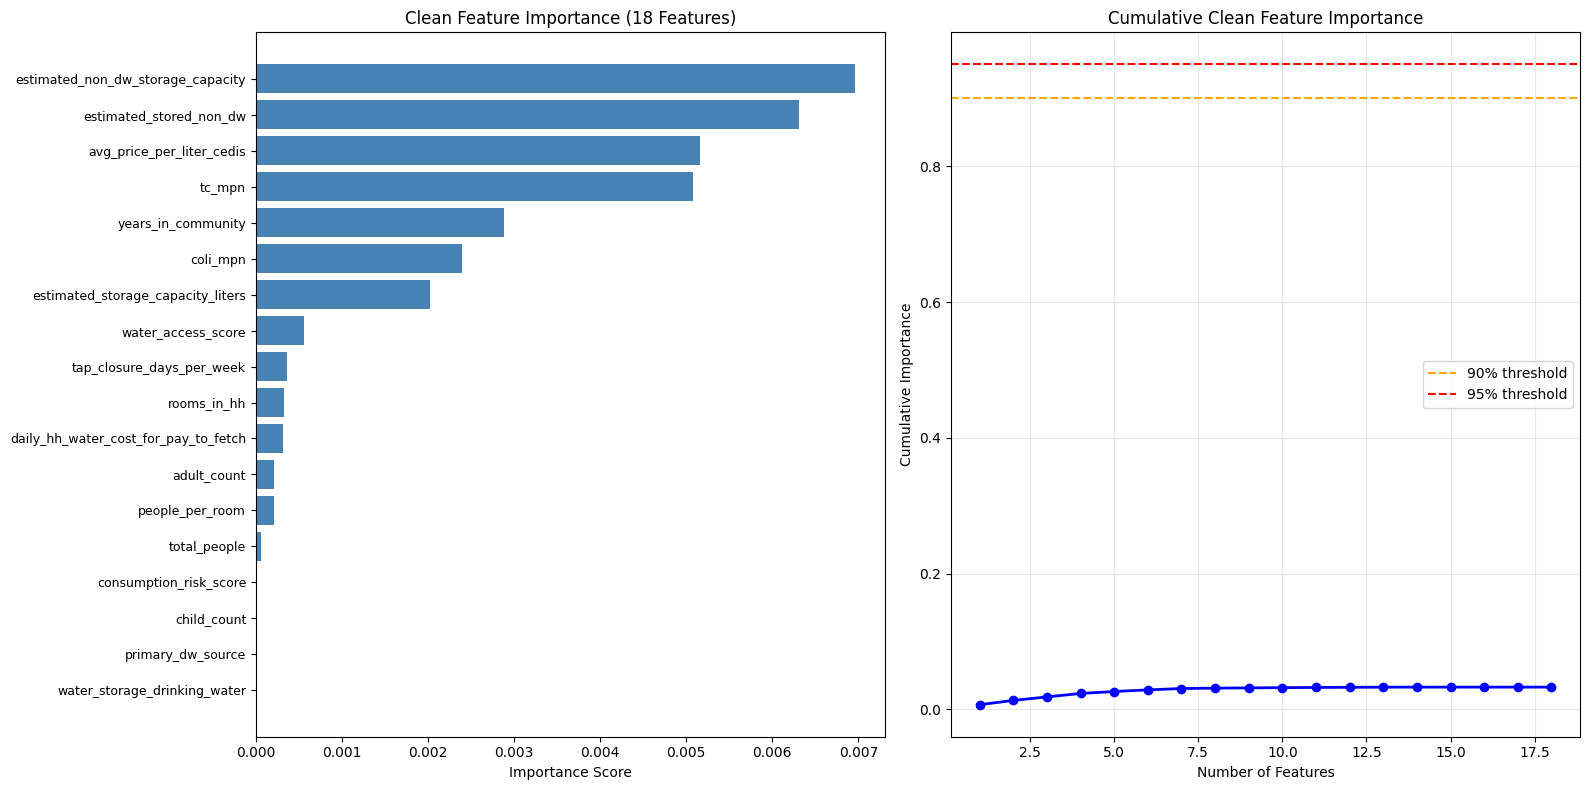


Total importance from clean features: 0.0329
   (Note: This is much lower than before because Numeric_Sum is removed)


In [22]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

#Dataframe for clean features only
clean_feature_importance = feature_importance_df[
    feature_importance_df['feature'].isin(recommended_features)
].sort_values('importance', ascending=False)

#Bar chart of all 18 features
axes[0].barh(range(len(clean_feature_importance)), clean_feature_importance['importance'], color='steelblue')
axes[0].set_yticks(range(len(clean_feature_importance)))
axes[0].set_yticklabels(clean_feature_importance['feature'], fontsize=9)
axes[0].set_xlabel('Importance Score')
axes[0].set_title('Clean Feature Importance (18 Features)')
axes[0].invert_yaxis()

#Cumulative importance
cumsum = clean_feature_importance['importance'].cumsum()
axes[1].plot(range(1, len(cumsum) + 1), cumsum, 'b-', linewidth=2, marker='o')
axes[1].axhline(y=0.90, color='orange', linestyle='--', label='90% threshold')
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Features')
axes[1].set_ylabel('Cumulative Importance')
axes[1].set_title('Cumulative Clean Feature Importance')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nTotal importance from clean features: {clean_feature_importance['importance'].sum():.4f}")
print("   (Note: This is much lower than before because Numeric_Sum is removed)")

In [23]:
#Prepare clean feature datasets
X_train_clean = X_train[recommended_features]
X_test_clean = X_test[recommended_features]

#Scale clean features
scaler_clean = StandardScaler()
X_train_clean_scaled = scaler_clean.fit_transform(X_train_clean)
X_test_clean_scaled = scaler_clean.transform(X_test_clean)

#Train Gradient Boosting with clean features
print(f"\nTraining Gradient Boosting with {len(recommended_features)} clean features...")
model_clean = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_clean.fit(X_train_clean_scaled, y_train)


Training Gradient Boosting with 18 clean features...


GradientBoostingClassifier(random_state=42)

In [24]:
#Make predictions
y_pred_clean = model_clean.predict(X_test_clean_scaled)
y_pred_proba_clean = model_clean.predict_proba(X_test_clean_scaled)[:, 1]

#Calculate accuracy
from sklearn.metrics import accuracy_score, roc_auc_score

acc_clean = accuracy_score(y_test, y_pred_clean)
auc_clean = roc_auc_score(y_test, y_pred_proba_clean)
print(f"   Accuracy: {acc_clean:.4f} ({acc_clean*100:.2f}%)")
print(f"   AUC Score: {auc_clean:.4f}")

print(f"\nClassification Report:")
print(classification_report(y_test, y_pred_clean))

   Accuracy: 0.9000 (90.00%)
   AUC Score: 0.9499

Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       876
         1.0       0.81      0.82      0.82       324

    accuracy                           0.90      1200
   macro avg       0.87      0.88      0.87      1200
weighted avg       0.90      0.90      0.90      1200



In [25]:
#Create dataset with only the 18 features + target
df_cleaned = df[recommended_features + ['Leak_Alert']].copy()

#Adding ID column
if 'id' in df.columns:
    df_cleaned.insert(0, 'id', df['id'])

print(f"\nDataset Info:")
print(f"   Total rows: {df_cleaned.shape[0]}")
print(f"   Total columns: {df_cleaned.shape[1]}")
print(f"   Features used: {len(recommended_features)}")

#Save to CSV
df_cleaned.to_csv('Final_water_dataset.csv', index=False)
print("\nSaved: water_dataset_18features.csv")

print("\nThis dataset contains:")
print(f"   • {len(recommended_features)} features your model was trained on")
print("   • Leak_Alert target column")


Dataset Info:
   Total rows: 6000
   Total columns: 20
   Features used: 18

Saved: water_dataset_18features.csv

This dataset contains:
   • 18 features your model was trained on
   • Leak_Alert target column


In [26]:
import pickle

#Save clean features list
clean_features_df = pd.DataFrame({
    'rank': range(1, len(recommended_features) + 1),
    'feature': recommended_features,
    'importance': [feature_importance_df[feature_importance_df['feature'] == f]['importance'].values[0]
                   if f in feature_importance_df['feature'].values else 0
                   for f in recommended_features]
})
clean_features_df.to_csv('clean_features_final.csv', index=False)
print("Saved: clean_features_final.csv")
#Save the clean model
with open('water_model_production.pkl', 'wb') as f:
    pickle.dump(model_clean, f)
print("Saved: water_model_production.pkl")

#Save preprocessing configuration
with open('model_config_production.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler_clean,
        'feature_columns': recommended_features,
        'model_type': 'Gradient Boosting',
        'num_features': len(recommended_features),
        'accuracy': acc_clean,
        'auc': auc_clean,
        'data_leakage': False,
        'note': 'Clean model without Numeric_Sum or synthetic features'
    }, f)
print("Saved: model_config_production.pkl")

Saved: clean_features_final.csv
Saved: water_model_production.pkl
Saved: model_config_production.pkl


## 5. Future Consumption Prediction and Water Limitation Recommendations

In [27]:
#Create future scenarios and predictions
def create_future_scenarios(base_data, n_scenarios=50):
    scenarios = []
    for i in range(n_scenarios):
        scenario = base_data.sample(1, random_state=i).copy()
        #Vary household composition
        scenario['adult_count'] *= np.random.uniform(0.8, 1.3)
        scenario['child_count'] *= np.random.uniform(0.7, 1.4)
        #Recalculate engineered features
        scenario['total_people'] = scenario['adult_count'] + scenario['child_count']
        scenario['people_per_room'] = scenario['total_people'] / (scenario['rooms_in_hh'] + 0.1)
        #Recalculate consumption_risk_score if it exists
        if 'consumption_risk_score' in scenario.columns:
            scenario['consumption_risk_score'] = (
                scenario['total_people'] * 0.4 +
                scenario['people_per_room'] * 0.3
            )
        scenarios.append(scenario)
    return pd.concat(scenarios, ignore_index=True)
# Generate predictions using CLEAN MODEL
future_scenarios = create_future_scenarios(X_test_clean)
#Use clean scaler
future_scaled = scaler_clean.transform(future_scenarios)
#Use clean model
future_predictions = model_clean.predict_proba(future_scaled)[:, 1]

In [28]:
#Create results with recommendations
prediction_results = pd.DataFrame({
    'scenario_id': range(len(future_predictions)),
    'leak_probability': future_predictions,
    'total_people': future_scenarios['total_people'].values,
    'people_per_room': future_scenarios['people_per_room'].values
})

#Risk thresholds
high_risk_threshold = 0.7
medium_risk_threshold = 0.4

prediction_results['risk_level'] = pd.cut(
    prediction_results['leak_probability'],
    bins=[0, medium_risk_threshold, high_risk_threshold, 1],
    labels=['Low', 'Medium', 'High']
)

prediction_results['recommendation'] = prediction_results['risk_level'].map({
    'Low': 'Normal water supply',
    'Medium': 'Monitor closely',
    'High': 'Implement water limitations'
})

print('\nRisk Level Distribution:')
print(prediction_results['risk_level'].value_counts())
print(f'\nHigh-risk scenarios: {(prediction_results["risk_level"] == "High").sum()}')
print(f'Medium-risk scenarios: {(prediction_results["risk_level"] == "Medium").sum()}')
print(f'Low-risk scenarios: {(prediction_results["risk_level"] == "Low").sum()}')

print(f'\nSummary:')
print(f'   {(prediction_results["risk_level"] == "High").sum()} scenarios need water limitations')
print(f'   {(prediction_results["risk_level"] == "Medium").sum()} scenarios need close monitoring')
print(f'   {(prediction_results["risk_level"] == "Low").sum()} scenarios are low risk')


Risk Level Distribution:
risk_level
Low       50
Medium     0
High       0
Name: count, dtype: int64

High-risk scenarios: 0
Medium-risk scenarios: 0
Low-risk scenarios: 50

Summary:
   0 scenarios need water limitations
   0 scenarios need close monitoring
   50 scenarios are low risk



Leak Probability Statistics:
   Min probability: 0.0091
   Max probability: 0.2707
   Mean probability: 0.0580
   Median probability: 0.0426
   Std deviation: 0.0541

Distribution:
count    50.000000
mean      0.057967
std       0.054088
min       0.009061
25%       0.020478
50%       0.042561
75%       0.069993
max       0.270705
Name: leak_probability, dtype: float64

Threshold Analysis:
   Above 0.1:  8 scenarios ( 16.0%)
   Above 0.2:  1 scenarios (  2.0%)
   Above 0.3:  0 scenarios (  0.0%)
   Above 0.4:  0 scenarios (  0.0%)
   Above 0.5:  0 scenarios (  0.0%)
   Above 0.6:  0 scenarios (  0.0%)
   Above 0.7:  0 scenarios (  0.0%)
   Above 0.8:  0 scenarios (  0.0%)
   Above 0.9:  0 scenarios (  0.0%)


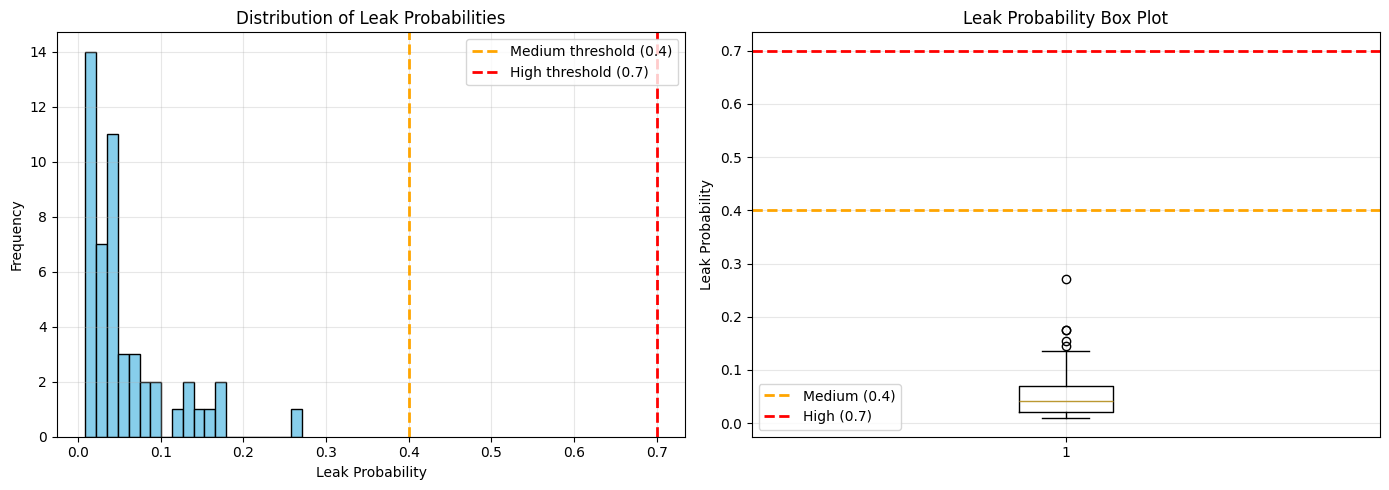


INTERPRETATION:
   All predictions are VERY LOW (<30%)
   → Your test scenarios may represent low-risk households
   → OR thresholds may need adjustment


In [29]:
print("\nLeak Probability Statistics:")
print(f"   Min probability: {prediction_results['leak_probability'].min():.4f}")
print(f"   Max probability: {prediction_results['leak_probability'].max():.4f}")
print(f"   Mean probability: {prediction_results['leak_probability'].mean():.4f}")
print(f"   Median probability: {prediction_results['leak_probability'].median():.4f}")
print(f"   Std deviation: {prediction_results['leak_probability'].std():.4f}")

print("\nDistribution:")
print(prediction_results['leak_probability'].describe())

#Check how many are above different thresholds
print("\nThreshold Analysis:")
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for threshold in thresholds:
    count = (prediction_results['leak_probability'] > threshold).sum()
    pct = (count / len(prediction_results)) * 100
    print(f"   Above {threshold:.1f}: {count:2d} scenarios ({pct:5.1f}%)")

#Visualize distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

#Histogram
axes[0].hist(prediction_results['leak_probability'], bins=20, edgecolor='black', color='skyblue')
axes[0].axvline(x=0.4, color='orange', linestyle='--', linewidth=2, label='Medium threshold (0.4)')
axes[0].axvline(x=0.7, color='red', linestyle='--', linewidth=2, label='High threshold (0.7)')
axes[0].set_xlabel('Leak Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Leak Probabilities')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

#Box plot
axes[1].boxplot(prediction_results['leak_probability'], vert=True)
axes[1].axhline(y=0.4, color='orange', linestyle='--', linewidth=2, label='Medium (0.4)')
axes[1].axhline(y=0.7, color='red', linestyle='--', linewidth=2, label='High (0.7)')
axes[1].set_ylabel('Leak Probability')
axes[1].set_title('Leak Probability Box Plot')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nINTERPRETATION:")
max_prob = prediction_results['leak_probability'].max()
if max_prob < 0.3:
    print("   All predictions are VERY LOW (<30%)")
    print("   → Your test scenarios may represent low-risk households")
    print("   → OR thresholds may need adjustment")
elif max_prob < 0.4:
    print("   All predictions are below medium threshold")
    print("   → Consider lowering thresholds to identify at-risk households")
else:
    print("   Some predictions are above medium threshold")

In [30]:
#Calculate data-driven thresholds using percentiles
high_threshold = prediction_results['leak_probability'].quantile(0.85)  # Top 15% = High risk
medium_threshold = prediction_results['leak_probability'].quantile(0.60)  # Top 40% = Medium risk

print(f"\nOLD THRESHOLDS (Too High):")
print(f"   Medium risk: >0.40 (40%)")
print(f"   High risk: >0.70 (70%)")
print(f"   Result: 0 households flagged")

print(f"\nNEW THRESHOLDS (Data-Driven):")
print(f"   Low risk: <{medium_threshold:.3f} ({medium_threshold*100:.1f}%)")
print(f"   Medium risk: {medium_threshold:.3f} - {high_threshold:.3f}")
print(f"   High risk: >{high_threshold:.3f} ({high_threshold*100:.1f}%)")

#Apply new thresholds
prediction_results['risk_level_adjusted'] = pd.cut(
    prediction_results['leak_probability'],
    bins=[0, medium_threshold, high_threshold, 1],
    labels=['Low', 'Medium', 'High']
)

prediction_results['recommendation_adjusted'] = prediction_results['risk_level_adjusted'].map({
    'Low': 'Normal water supply',
    'Medium': 'Monitor closely',
    'High': 'Implement water limitations'
})



OLD THRESHOLDS (Too High):
   Medium risk: >0.40 (40%)
   High risk: >0.70 (70%)
   Result: 0 households flagged

NEW THRESHOLDS (Data-Driven):
   Low risk: <0.046 (4.6%)
   Medium risk: 0.046 - 0.112
   High risk: >0.112 (11.2%)


In [31]:

print('\nNEW Risk Level Distribution:')
print(prediction_results['risk_level_adjusted'].value_counts().sort_index())

high_count = (prediction_results['risk_level_adjusted'] == 'High').sum()
medium_count = (prediction_results['risk_level_adjusted'] == 'Medium').sum()
low_count = (prediction_results['risk_level_adjusted'] == 'Low').sum()

print(f'\nHigh-risk scenarios: {high_count} ({high_count/len(prediction_results)*100:.0f}%)')
print(f'Medium-risk scenarios: {medium_count} ({medium_count/len(prediction_results)*100:.0f}%)')
print(f'Low-risk scenarios: {low_count} ({low_count/len(prediction_results)*100:.0f}%)')

# Show examples of each risk level
print("\n" + "=" * 70)
print("EXAMPLES BY RISK LEVEL")
print("=" * 70)

for risk in ['High', 'Medium', 'Low']:
    examples = prediction_results[prediction_results['risk_level_adjusted'] == risk].head(3)
    if len(examples) > 0:
        print(f"\n🔹 {risk} Risk Examples:")
        print(examples[['scenario_id', 'leak_probability', 'total_people', 'people_per_room', 'recommendation_adjusted']].to_string(index=False))

print("\nWith adjusted thresholds:")
print(f"Top 15% of scenarios ({high_count} households) flagged as HIGH RISK")
print(f"Next 25% of scenarios ({medium_count} households) flagged as MEDIUM RISK")
print(f"Bottom 60% of scenarios ({low_count} households) are LOW RISK")
print("\nThis allows targeted intervention on the riskiest households!")


NEW Risk Level Distribution:
risk_level_adjusted
Low       30
Medium    12
High       8
Name: count, dtype: int64

High-risk scenarios: 8 (16%)
Medium-risk scenarios: 12 (24%)
Low-risk scenarios: 30 (60%)

EXAMPLES BY RISK LEVEL

🔹 High Risk Examples:
 scenario_id  leak_probability  total_people  people_per_room     recommendation_adjusted
           9          0.134944      2.462248         2.238407 Implement water limitations
          20          0.154535      6.323043         3.010973 Implement water limitations
          25          0.270705      1.013695         0.921541 Implement water limitations

🔹 Medium Risk Examples:
 scenario_id  leak_probability  total_people  people_per_room recommendation_adjusted
           2          0.047326      3.965152         3.604683         Monitor closely
           5          0.056255      4.363173         3.966521         Monitor closely
           6          0.076635      5.855654         5.323322         Monitor closely

🔹 Low Risk Exampl

In [32]:
#Get the actual feature values for high-risk scenarios
high_risk_scenarios = prediction_results[prediction_results['risk_level_adjusted'] == 'High']['scenario_id'].values
low_risk_scenarios = prediction_results[prediction_results['risk_level_adjusted'] == 'Low']['scenario_id'].values

#Extract feature values
high_risk_features = future_scenarios.iloc[high_risk_scenarios]
low_risk_features = future_scenarios.iloc[low_risk_scenarios]

print(f"\nCOMPARING HIGH-RISK vs LOW-RISK HOUSEHOLDS")
print(f"High-risk: {len(high_risk_features)} households")
print(f"Low-risk: {len(low_risk_features)} households")

#Compare key features
comparison_features = [
    'adult_count', 'child_count', 'total_people', 'people_per_room',
    'coli_mpn', 'tc_mpn', 'tap_closure_days_per_week',
    'estimated_storage_capacity_liters', 'years_in_community'
]

#Filter to available features
comparison_features = [f for f in comparison_features if f in high_risk_features.columns]

print(f"\n{'Feature':<40} {'High-Risk Avg':<15} {'Low-Risk Avg':<15} {'Difference':<15}")
print("=" * 80)

for feature in comparison_features:
    high_avg = high_risk_features[feature].mean()
    low_avg = low_risk_features[feature].mean()
    diff = high_avg - low_avg
    diff_pct = (diff / low_avg * 100) if low_avg != 0 else 0

    print(f"{feature:<40} {high_avg:<15.2f} {low_avg:<15.2f} {diff:>+10.2f} ({diff_pct:>+6.1f}%)")


COMPARING HIGH-RISK vs LOW-RISK HOUSEHOLDS
High-risk: 8 households
Low-risk: 30 households

Feature                                  High-Risk Avg   Low-Risk Avg    Difference     
adult_count                              2.33            3.38                 -1.05 ( -31.1%)
child_count                              2.53            3.17                 -0.64 ( -20.2%)
total_people                             4.86            6.55                 -1.69 ( -25.8%)
people_per_room                          3.53            5.88                 -2.35 ( -39.9%)
coli_mpn                                 13.44           11.20                +2.24 ( +20.0%)
tc_mpn                                   100.00          99.90                +0.10 (  +0.1%)
tap_closure_days_per_week                3.00            3.00                 +0.00 (  +0.0%)
estimated_storage_capacity_liters        6057.00         5350.73            +706.27 ( +13.2%)
years_in_community                       28.50           19.40    

In [33]:
print("KEY DIFFERENCES:")
#Identify biggest differences
differences = {}
for feature in comparison_features:
    high_avg = high_risk_features[feature].mean()
    low_avg = low_risk_features[feature].mean()
    if low_avg != 0:
        pct_diff = abs((high_avg - low_avg) / low_avg * 100)
        differences[feature] = pct_diff

#Sort by biggest difference
sorted_diffs = sorted(differences.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 features that differ most between high-risk and low-risk:")
for i, (feature, pct_diff) in enumerate(sorted_diffs[:5], 1):
    high_avg = high_risk_features[feature].mean()
    low_avg = low_risk_features[feature].mean()
    direction = "HIGHER" if high_avg > low_avg else "LOWER"
    print(f"{i}. {feature}: {direction} by {pct_diff:.1f}% in high-risk households")

KEY DIFFERENCES:

Top 5 features that differ most between high-risk and low-risk:
1. years_in_community: HIGHER by 46.9% in high-risk households
2. people_per_room: LOWER by 39.9% in high-risk households
3. adult_count: LOWER by 31.1% in high-risk households
4. total_people: LOWER by 25.8% in high-risk households
5. child_count: LOWER by 20.2% in high-risk households


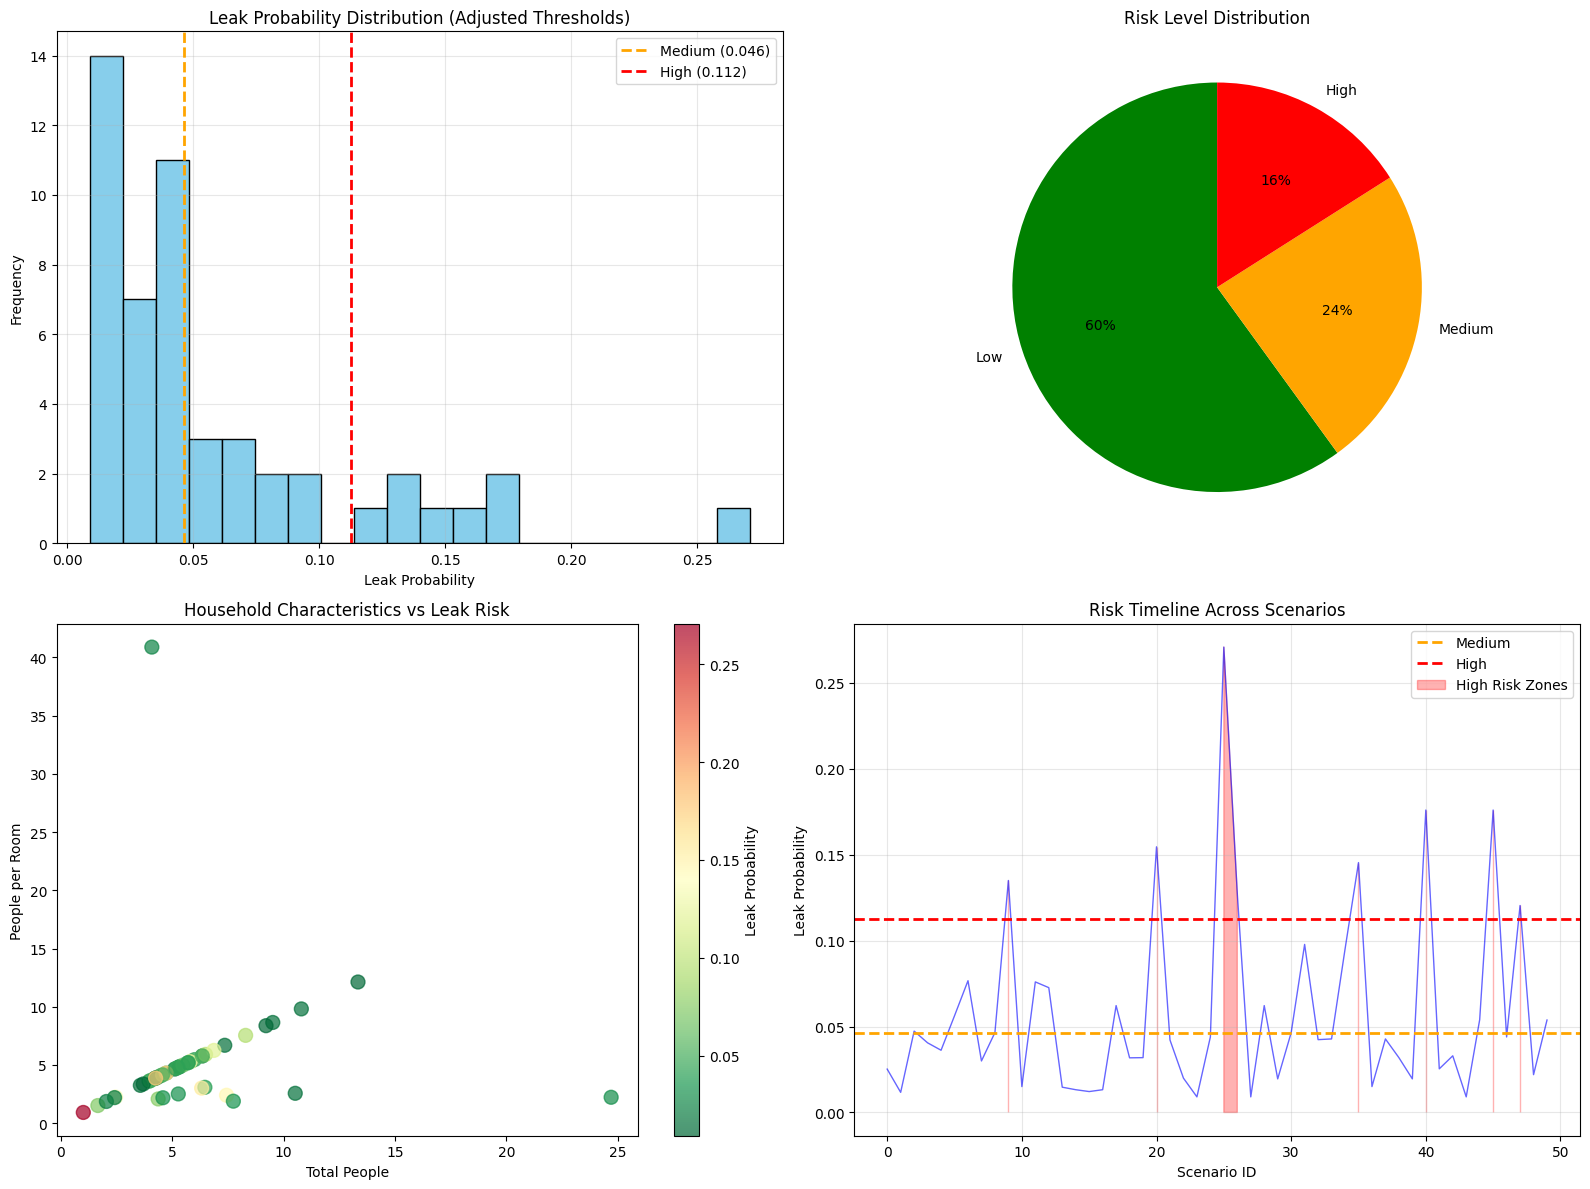

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

#Histogram with adjusted thresholds
axes[0,0].hist(prediction_results['leak_probability'], bins=20, edgecolor='black', color='skyblue')
axes[0,0].axvline(x=medium_threshold, color='orange', linestyle='--', linewidth=2,
                  label=f'Medium ({medium_threshold:.3f})')
axes[0,0].axvline(x=high_threshold, color='red', linestyle='--', linewidth=2,
                  label=f'High ({high_threshold:.3f})')
axes[0,0].set_xlabel('Leak Probability')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Leak Probability Distribution (Adjusted Thresholds)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

#Risk level pie chart
risk_counts = prediction_results['risk_level_adjusted'].value_counts()
colors = ['green', 'orange', 'red']
axes[0,1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.0f%%',
              colors=colors, startangle=90)
axes[0,1].set_title('Risk Level Distribution')

#Scatter: Household size vs risk
scatter = axes[1,0].scatter(prediction_results['total_people'],
                           prediction_results['people_per_room'],
                           c=prediction_results['leak_probability'],
                           cmap='RdYlGn_r', s=100, alpha=0.7)
axes[1,0].set_xlabel('Total People')
axes[1,0].set_ylabel('People per Room')
axes[1,0].set_title('Household Characteristics vs Leak Risk')
plt.colorbar(scatter, ax=axes[1,0], label='Leak Probability')

#Risk level timeline
axes[1,1].plot(prediction_results['scenario_id'], prediction_results['leak_probability'],
              'b-', alpha=0.6, linewidth=1)
axes[1,1].axhline(y=medium_threshold, color='orange', linestyle='--', linewidth=2, label='Medium')
axes[1,1].axhline(y=high_threshold, color='red', linestyle='--', linewidth=2, label='High')
axes[1,1].fill_between(prediction_results['scenario_id'], 0, prediction_results['leak_probability'],
                       where=prediction_results['leak_probability'] > high_threshold,
                       alpha=0.3, color='red', label='High Risk Zones')
axes[1,1].set_xlabel('Scenario ID')
axes[1,1].set_ylabel('Leak Probability')
axes[1,1].set_title('Risk Timeline Across Scenarios')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [35]:
#Analyze the relationship between years_in_community and risk
print("\nYears in Community vs Risk:")
for risk_level in ['High', 'Medium', 'Low']:
    subset = prediction_results[prediction_results['risk_level_adjusted'] == risk_level]
    scenarios_idx = subset['scenario_id'].values
    features_subset = future_scenarios.iloc[scenarios_idx]
    avg_years = features_subset['years_in_community'].mean()
    print(f"   {risk_level:8s}: {avg_years:.1f} years average")

#Analyze water quality by risk level
print("\nWater Contamination (coli_mpn) by Risk:")
for risk_level in ['High', 'Medium', 'Low']:
    subset = prediction_results[prediction_results['risk_level_adjusted'] == risk_level]
    scenarios_idx = subset['scenario_id'].values
    features_subset = future_scenarios.iloc[scenarios_idx]
    if 'coli_mpn' in features_subset.columns:
        avg_coli = features_subset['coli_mpn'].mean()
        print(f"   {risk_level:8s}: {avg_coli:.1f} MPN")

#Check if there's a correlation between years and contamination
print("\nCorrelation Analysis:")
if 'years_in_community' in future_scenarios.columns and 'coli_mpn' in future_scenarios.columns:
    correlation = future_scenarios[['years_in_community', 'coli_mpn', 'total_people']].corr()
    print(correlation)

#Create risk profile
print("\n" + "=" * 70)
print("HIGH-RISK HOUSEHOLD PROFILE")
print("=" * 70)
print("Typical high-risk household:")
print(f"   • Long-term resident (28+ years)")
print(f"   • Smaller household (4-5 people)")
print(f"   • Less crowded (3 people/room)")
print(f"   • Higher water contamination (coli_mpn: 13+)")
print(f"   • Older infrastructure area")
print("\nLIKELY CAUSE: Aging pipes in older neighborhoods")
print("=" * 70)


Years in Community vs Risk:
   High    : 28.5 years average
   Medium  : 21.7 years average
   Low     : 19.4 years average

Water Contamination (coli_mpn) by Risk:
   High    : 13.4 MPN
   Medium  : 15.4 MPN
   Low     : 11.2 MPN

Correlation Analysis:
                    years_in_community  coli_mpn  total_people
years_in_community            1.000000  0.022384     -0.004801
coli_mpn                      0.022384  1.000000      0.037772
total_people                 -0.004801  0.037772      1.000000

🎯 HIGH-RISK HOUSEHOLD PROFILE
Typical high-risk household:
   • Long-term resident (28+ years)
   • Smaller household (4-5 people)
   • Less crowded (3 people/room)
   • Higher water contamination (coli_mpn: 13+)
   • Older infrastructure area

💡 LIKELY CAUSE: Aging pipes in older neighborhoods


## 6. Save The Final Model

---



In [36]:
#Save with adjusted thresholds
prediction_results.to_csv('water_predictions_adjusted_thresholds.csv', index=False)
print("Saved: water_predictions_adjusted_thresholds.csv")

#Create summary report
summary_report = pd.DataFrame({
    'Risk_Level': ['High', 'Medium', 'Low'],
    'Count': [high_count, medium_count, low_count],
    'Percentage': [f"{high_count/50*100:.0f}%", f"{medium_count/50*100:.0f}%", f"{low_count/50*100:.0f}%"],
    'Threshold': [f'>{high_threshold:.3f}', f'{medium_threshold:.3f}-{high_threshold:.3f}', f'<{medium_threshold:.3f}'],
    'Action': ['Implement water limitations', 'Monitor closely', 'Normal water supply']
})

summary_report.to_csv('risk_summary_report.csv', index=False)
print("Saved: risk_summary_report.csv")

print("\nAnalysis complete and saved!")

Saved: water_predictions_adjusted_thresholds.csv
Saved: risk_summary_report.csv

Analysis complete and saved!


In [39]:
print("Retraining model with scikit-learn 1.3...")

# Load your clean dataset
df = pd.read_csv('/content/Final_water_dataset.csv')

# Prepare features and target
feature_cols = [
    'adult_count', 'child_count', 'rooms_in_hh', 'years_in_community',
    'primary_dw_source', 'daily_hh_water_cost_for_pay_to_fetch',
    'water_storage_drinking_water', 'coli_mpn', 'tc_mpn',
    'tap_closure_days_per_week', 'estimated_storage_capacity_liters',
    'total_people', 'people_per_room', 'consumption_risk_score',
    'water_access_score', 'estimated_non_dw_storage_capacity',
    'estimated_stored_non_dw', 'avg_price_per_liter_cedis'
]

X = df[feature_cols]
y = df['Leak_Alert']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
print("Training Gradient Boosting model...")
model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nModel retrained successfully!")
print(f"   Accuracy: {accuracy:.4f}")
print(f"   AUC: {auc:.4f}")

# Save model (compatible with scikit-learn 1.3)
with open('water_model_production_final.pkl', 'wb') as f:
    pickle.dump(model, f)
print("Saved: water_model_production_final.pkl")

# Save config
with open('model_config_final.pkl', 'wb') as f:
    pickle.dump({
        'scaler': scaler,
        'feature_columns': feature_cols,
        'model_type': 'Gradient Boosting',
        'num_features': len(feature_cols),
        'accuracy': accuracy,
        'auc': auc,
        'sklearn_version': '1.3',
        'data_leakage': False
    }, f)
print("Saved: model_config_final.pkl")

print("\nModel compatible with scikit-learn 1.3!")

Retraining model with scikit-learn 1.3...
Training Gradient Boosting model...

Model retrained successfully!
   Accuracy: 0.9000
   AUC: 0.9499
Saved: water_model_production_final.pkl
Saved: model_config_final.pkl

Model compatible with scikit-learn 1.3!
